# 2 パーセプトロン

## 2-1 パーセプトロンとは

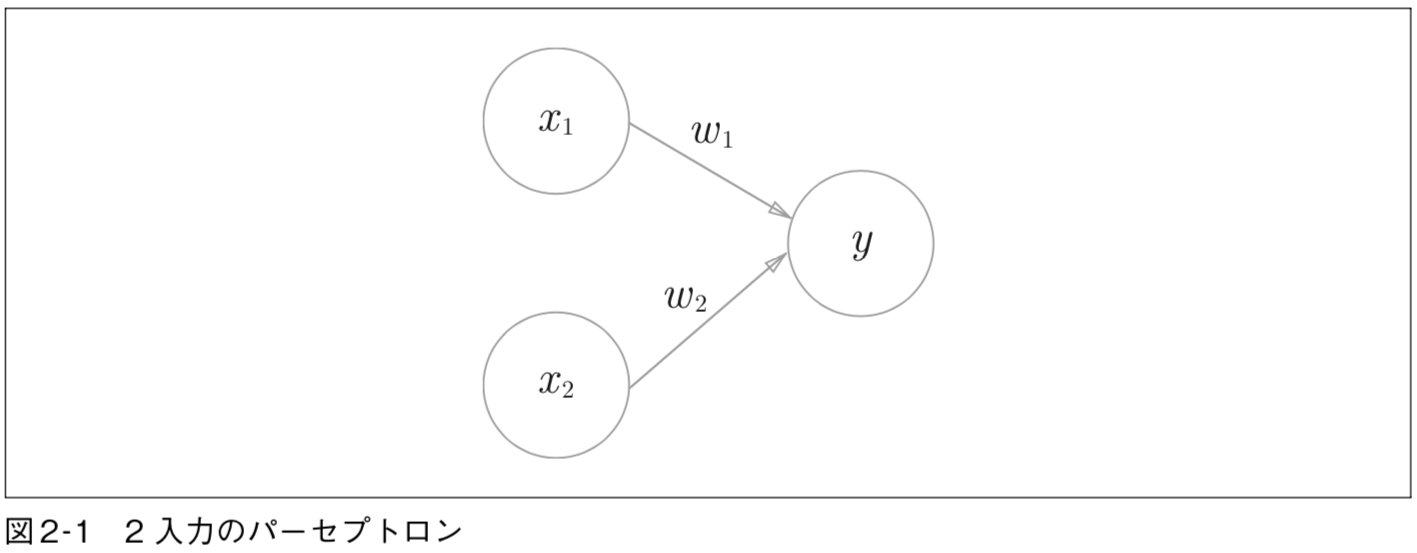

In [1]:
from IPython.display import Image, display
Image('images/fig2-1.png', width = 500)

複数の信号を入力$y$として受け取り, ひとつの信号を出力するもの. $x_1, x_2$を入力信号, $y$を出力信号, $w_1, w_2$を重みとする. 

入力信号は ニューロン(ノード)に送られる際に, それぞれに固有の重みが乗算される. 

ニューロンでは送られてきた信号の総和が計算され, その総和がある限界値を超えた場合にのみ$1$を出力する. 

これをニューロンが発火すると表現する. ここでは, その限界値を閾値と呼び, $\theta$で表すこととする. 

以上を式で表すと以下のようになる.

$$
\begin{eqnarray}
y=
    \left\{
        \begin{array}{l}
        0\ \     (w_1 x_1 + w_2 x_2 \le \theta)\\
        1\ \     (w_1 x_1 + w_2 x_2 > \theta)
        \end{array}
    \right.
\end{eqnarray}
$$

## 2.2 単純な論理回路

### 2.2.1-2 ANDゲート, NANDゲート, ORゲート

ANDゲートは2入力1出力のゲートで, 2つの入力が$1$のときのみ$1$を出力し, それ以外は$0$を出力する.

NANDゲートは2入力1出力のゲートで, 2つの入力が$1$のときのみ$0$を出力し, それ以外は$1$を出力する.

ORゲートは2入力1出力のゲートで, 入力の少なくとも1つが$1$でれば, $1$を出力する.

## 2.3 パーセプトロンの実装

### 2.3.1 簡単な実装

In [2]:
# ANDゲート
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1* w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


### 2.3.2 重みとバイアスの導入

$$
\begin{eqnarray}
y=
    \left\{
        \begin{array}{l}
        0\ \     (b + w_1 x_1 + w_2 x_2 \le 0)\\
        1\ \     (b + w_1 x_1 + w_2 x_2 > 0)
        \end{array}
    \right.
\end{eqnarray}
$$

 $b$はバイアス, $w_1, w_2$を重みと呼ぶ. 
 
 パーセプトロンでは, 入力信号に重みが乗算された値とバイアスの和が計算され, その値が$0$を上回れば$1$を出力し, そうでなければ$0$をを出力する. 

### 2.3.3  重みとバイアスによる実装

In [3]:
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


$w_1$や$w_2$は入力信号への重要度をコントロールするパラメータとして機能するが,

バイアスは発火のしやすさ (出力信号が 1 を出力する度合い)を調整するパラメータとして機能する.

In [4]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 重みとバイアスがANDと違う
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))    


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 重みとバイアスがANDと違う
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(OR(0, 0))
print(OR(1, 0))
print(OR(0, 1))
print(OR(1, 1))

1
1
1
0
0
1
1
1


## 2.4 パーセプトロンの限界

### 2.4.1 XORゲート

排他的論理和とも呼ばれる. $x_1, x_2$のどとらかが$1$のときだけ出力が$1$になる. 

XORゲートはこれまで見てきたパーセプトロンで実現することができない.

ORゲートでは, たとえば$(b, w_1, w_2) = (-0.5, 1.0, 1.0)$のとき真理値表を満たす.

このときのパーセプトロンは次式で表される.

$$
\begin{eqnarray}
y=
    \left\{
        \begin{array}{l}
        0\ \     (-0.5 + x_1 + x_2 \le 0)\\
        1\ \     (-0.5 + x_1 + x_2 > 0)
        \end{array}
    \right.
\end{eqnarray}
$$

このパーセプトロンは$-0.5 + x_1 + x_2 = 0$の直線で分断された2つの領域(下図)を作る. 分断された片方の領域は$1$を出力し, もう片方は$0$を出力する. 

下図のように, 直線によってORゲートは実現できる.

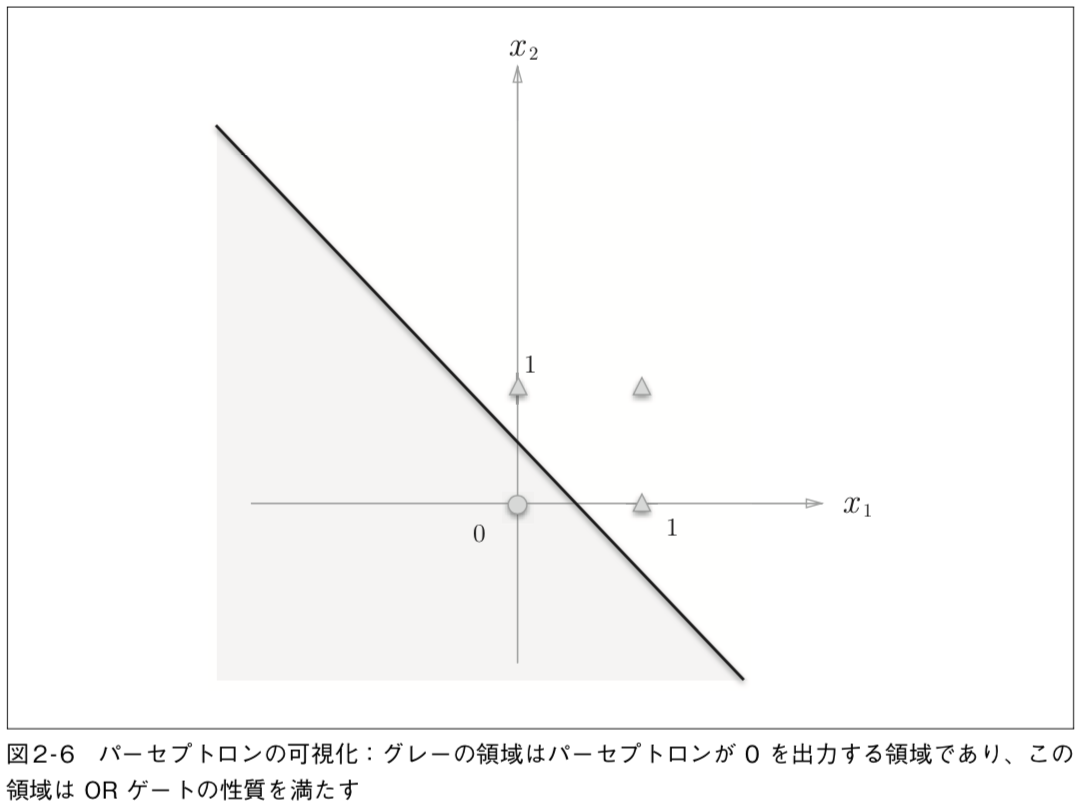

In [5]:
Image('images/fig2-6.png', width = 600)

### 2.4.2 線形･非線形

XORゲートは1本の直線で実現することは不可能であるが, 直線でなければ可能である.

パーセプトロンの限界は, 1本の直線で分けた領域だけしか表現できない点にあり, 図2-8のような曲線をパーセプトロンでは表現できない.

直線による領域を線形な領域, 曲線による領域を非線形な領域という. 

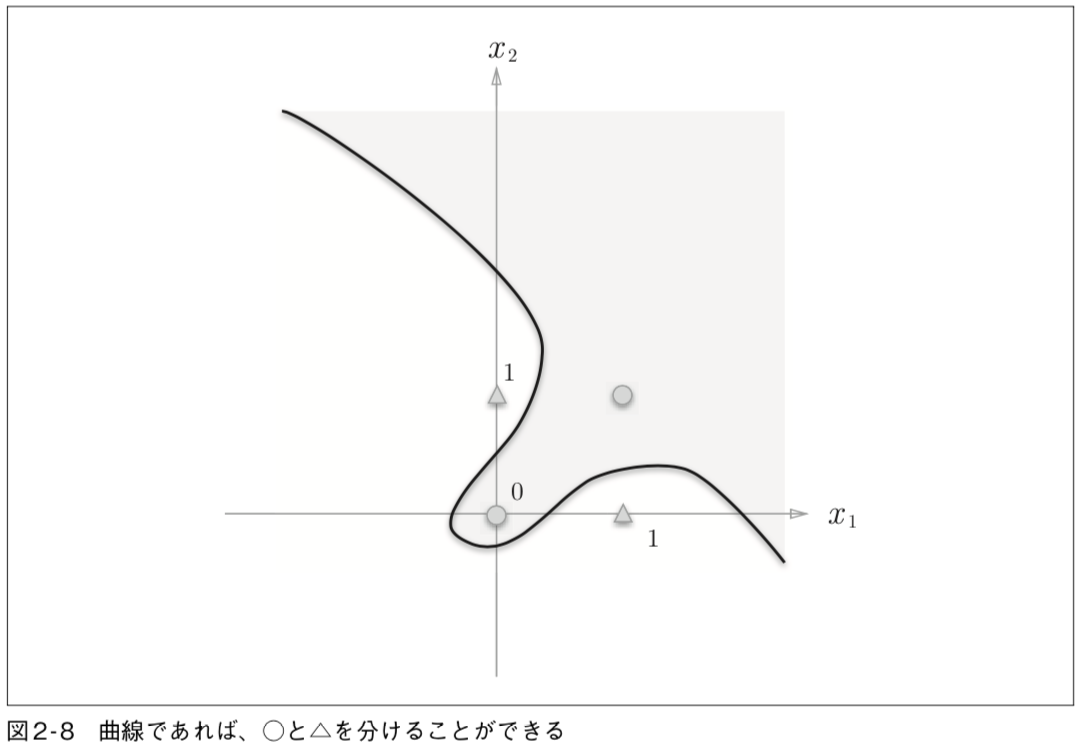

In [10]:
Image('images/fig2-8.png', width = 600)

## 2.5 多層パーセプトロン

1つのパーセプトロンではXORゲートを表現できなかったが, パーセプトロンの層を重ねることによってXORゲートを表現できるようになる.

### 2.5.1 既存ゲートの組み合わせ

AND, NAND, ORゲートをそれぞれ図2-9のように表記すると, XORゲートは図2-11のように表現できる.

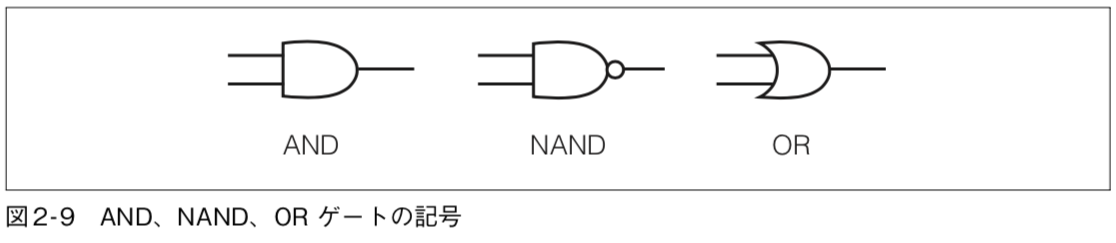

In [6]:
Image('images/fig2-9.png', width = 600)

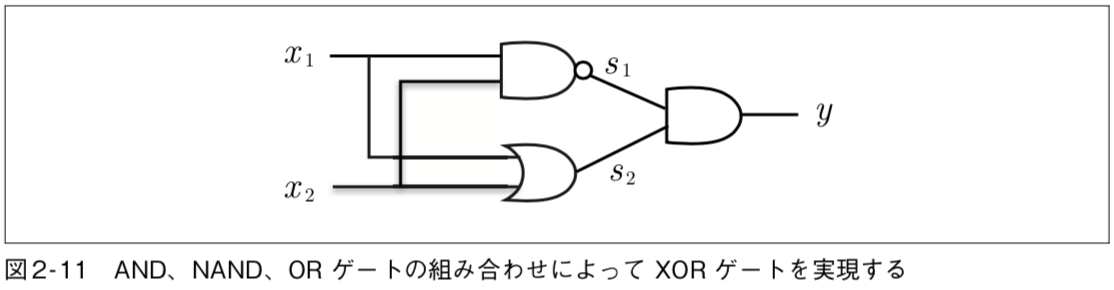

In [7]:
Image('images/fig2-11.png', width = 600)

### 2.5.2 XORゲートの実装

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


XORゲートを, パーセプトロンの表現で表すと, 図2-13のようになる.

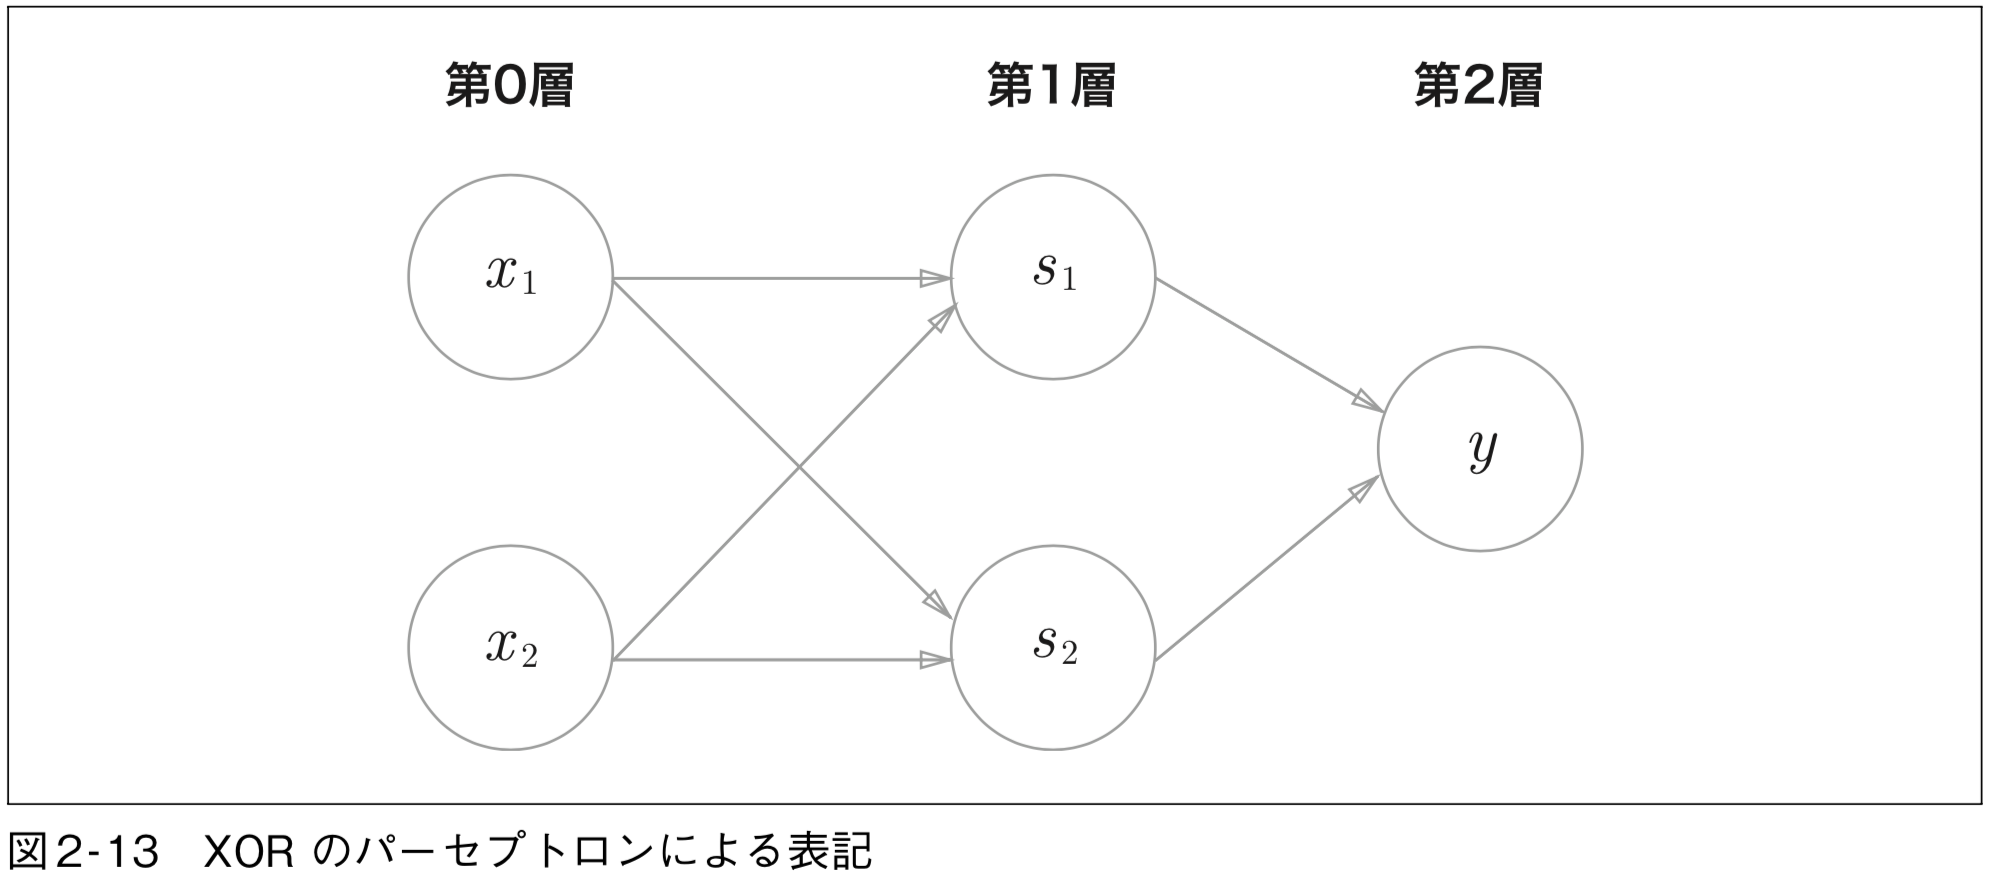

In [9]:
Image('images/fig2-13.png', width = 600)

XORは多層構造のネットワークである. ここでは, 1番左の段を第0層, その右を第1層, 1番右を第2層と呼ぶことにする.

ANDやORが単層のパーセプトロンであったのに対して, XORは2層のパーセプトロンである. 

層を複数重ねたパーセプトロンを多層パーセプトロン(multi-layered perceptron)という.

図2-13のような2層のパーセプトロンでは, 第0層と第1層のニューロンの間で信号の送受信が行われ, 続いて第1層と第2層の間で信号の送受信が行われる.

「単層のパーセプトロンでは表現できなかったことが, 層をひとつ増やすことによって実現できるようになった」と 解釈できる.

つまり, パーセプトロンは層を重ねることで(層を深くすることで), より柔軟な表現が可能になったと言える.


## 2.6 NANDからコンピュータへ

多層パーセプトロンは, 複雑な回路をつくることができ, 2進数を10進数に変換するエンコーダやパリティチェック用の回路, さらにはコンピュータも表現できる.

## 2.7 まとめ

パーセプトロンは次以降のニューラルネットワークの基礎となるため非常に重要です.